# Image Captioning - PoC

The objective is to integrate an open-source model to be responsible for captioning images. For that, I chose [LLaVA - Large Language and Vision Assistant](https://llava-vl.github.io).

> [LLaVA is] a trained large multimodal model that combines a vision encoder and Vicuna for general-purpose visual and language understanding, achieving impressive chat capabilities mimicking spirits of the multimodal GPT-4 and setting a new state-of-the-art accuracy on Science QA.

This model was chosen for cost-effective reasons, since it can be used freely and out-of-the box from Groq API. In other words, it's a good way to prototype since I don't spend time on deploying the model to a serverless platform or spend intense local computing power to run it locally.


## Importing libraries

The library imports and inspiration for the functions you can find at [https://console.groq.com/docs/vision](https://console.groq.com/docs/vision).

In [1]:
from groq import Groq
import base64
import os 
from dotenv import load_dotenv
from IPython.display import Image, display

os.chdir('../')

_ = load_dotenv()

GROQ_API_KEY = os.getenv('GROQ_API_KEY')

client_groq = Groq(
    api_key=GROQ_API_KEY,
)

## Defining helper functions

In [2]:

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
  
def image_captioning(
        client, 
        base64_image, 
        model: str = "llava-v1.5-7b-4096-preview"):
    try:
        response = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": """You are a helpful assistant. Your objective is to provide a 100 words caption to the image. Be clear and objective. Your tone and language-level must be adequate for high-school studentes who want to learn and understand about the image.
                        """},
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpeg;base64,{base64_image}",
                            },
                        },
                    ],
                }
            ],
            model=model,
        )
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    return {
        "caption": response.choices[0].message.content
    }

## Inference

As stated in Groq's documentation the maximum allowed size for a request containing an image URL as input is 20MB. Requests larger than this limit will return a 400 error.


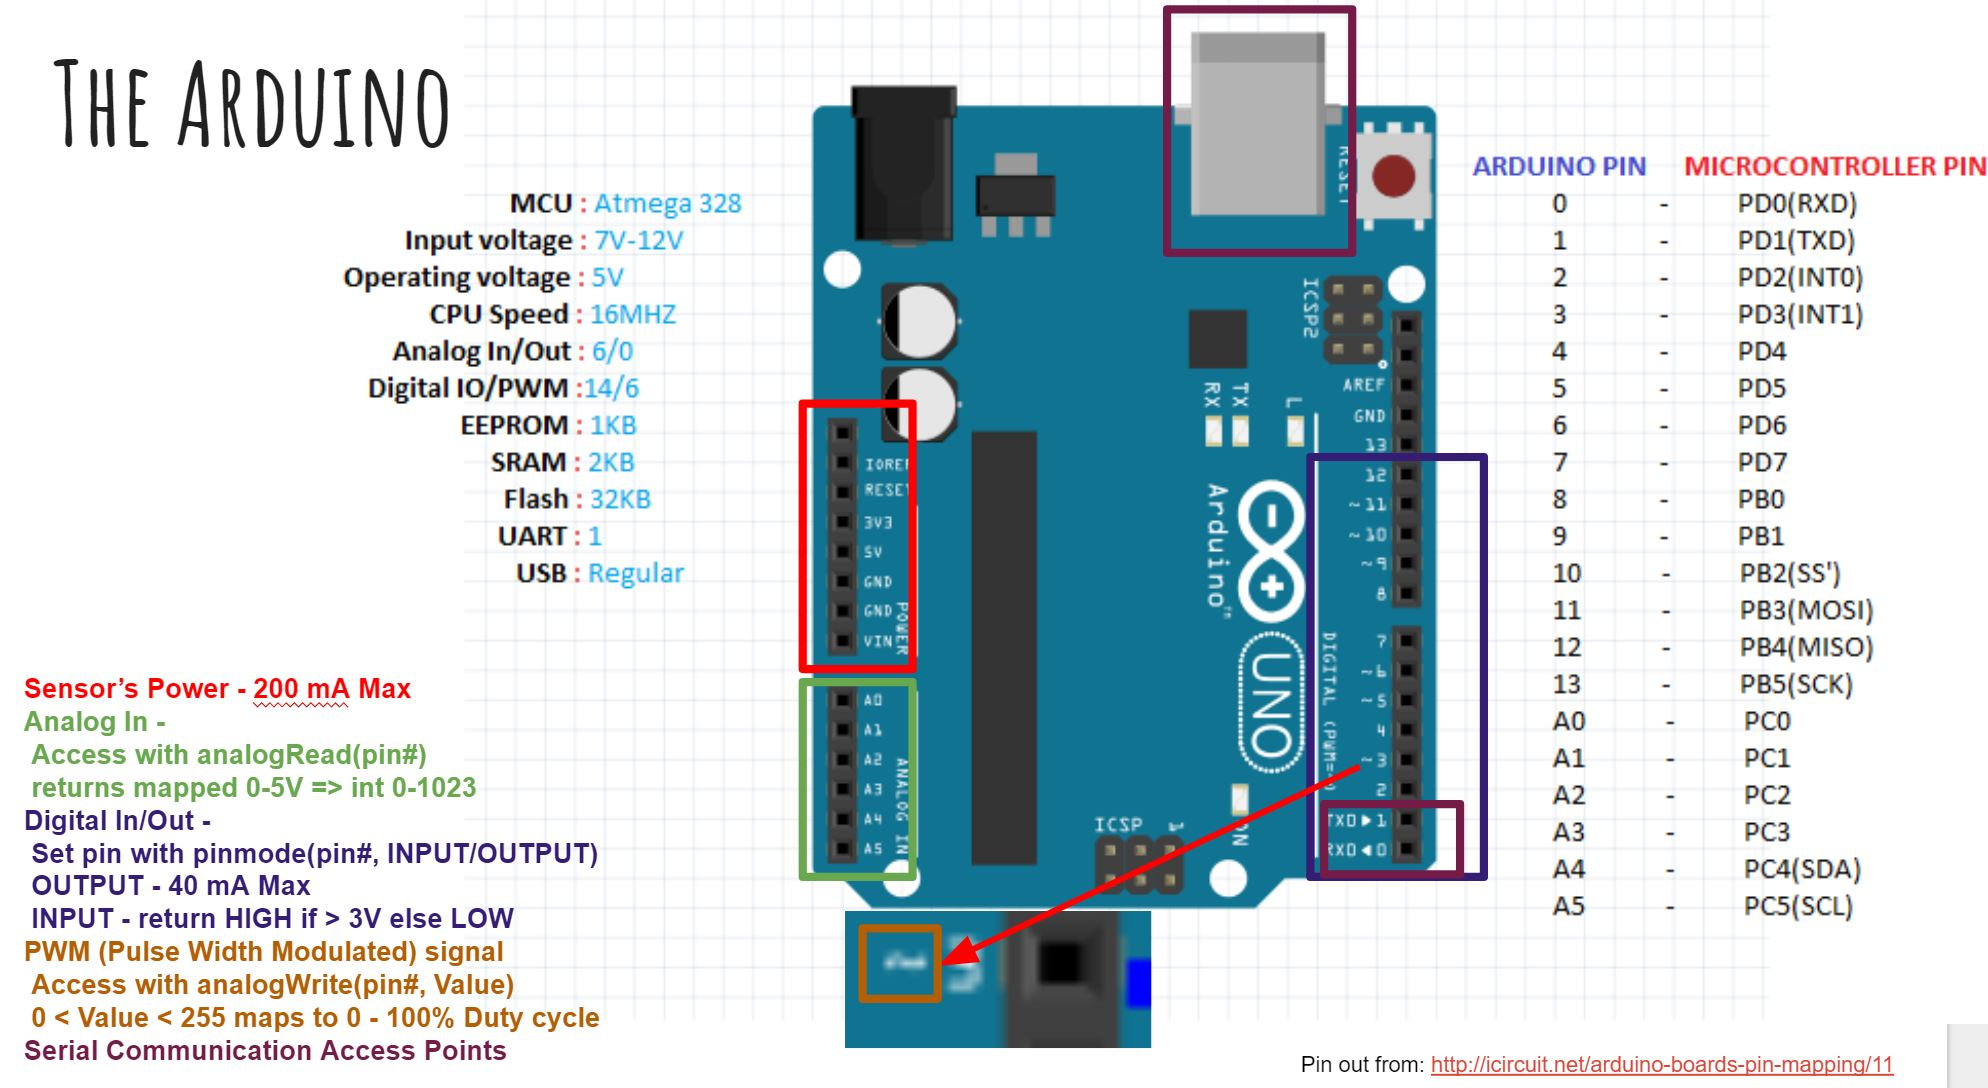

The image showcases a detailed visual guide to the ESP32 WiFi Nodemcul ESP-WROOM WIFI REPEATER module for the Arduino platform. The guide's main components are highlighted with red boxes for visibility against the white background. An overlay of the blue Arduino Uno micro-controller displays its function. This visual guide is helpful for any electronics enthusiast, or anyone running a project that needs reliable communication with the outside world. With well-labeled components, it makes it easier-to-follow for users of all skill levels. The guide explains each connection and the importance of them for the operation of the device. To the far right, there is a tag pointing to the FIRMWARE MOUNTING BRIDGE. This blue microcontroller is designed to handle data even in high-density applications, making it ideal for large-scale prototypes. With a total of thirteen symbols, it identifies diverse elements like the "Sail" and small icons on this diagram.


In [6]:
# Path to your image
image_path = "src/dataset/arduino-uno.jpg"

# Getting the base64 string
encoded_image = encode_image(image_path)

caption = image_captioning(
        client=client_groq, 
        base64_image=encoded_image, 
        )

display(Image(filename=image_path)) 

print(caption)

From the previous output, it can be seen that the model gets confused with images with complex diagrams and texts. 

But now let's test with a simpler image and see how it goes.

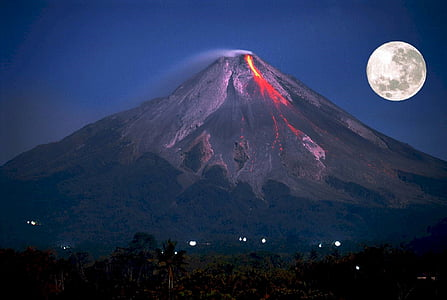

The image shows a beautiful scene of a red glowing volcano or even a red moon rising over a peak or ocean at dawn. The shoreline has a few lights that shine through the darkness. The moon in the upper right shows a pale reflection in the water, further emphasizing the presence of the giant glowing red moon. This enchanting display is enough to catch the enthusiast's eye and evoke a sense of awe.


In [8]:
# Path to your image
image_path = "src/dataset/volcano-erupting.jpg"

# Getting the base64 string
encoded_image = encode_image(image_path)

caption = image_captioning(
        client=client_groq, 
        base64_image=encoded_image, 
        )

display(Image(filename=image_path)) 

print(caption)